In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.drop(['date', 'lights'], axis = 1, inplace = True)

In [4]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
#From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2)
#and the temperature outside the building (y = T6). What is the R^2 value in two D.P?

In [6]:

x = normalised_df.drop(['T2'], axis=1)

y = normalised_df['T6']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [8]:
model = linear_model.LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
predictions = model.predict(x_test)
predictions

array([0.21142691, 0.25018192, 0.16877699, ..., 0.45597439, 0.56063788,
       0.54038713])

In [11]:
metrics.r2_score(y_test, predictions)

1.0

In [12]:
metrics.mean_absolute_error(y_test, predictions)

2.985457892732548e-16

In [13]:
metrics.mean_squared_error(y_test, predictions)

1.4300394267691115e-31

In [14]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

3.7815862105327063e-16

In [15]:
metrics.explained_variance_score(y_test, predictions)

1.0

In [16]:
model.coef_

array([-3.21447091e-16,  1.38777878e-15,  1.74166237e-15, -1.09634524e-15,
        7.91033905e-16, -8.53483950e-16, -1.87350135e-16, -5.27355937e-16,
       -2.25514052e-16, -3.09648140e-16,  1.00000000e+00, -3.05311332e-16,
       -2.46330734e-16,  1.17961196e-16, -6.52256027e-16,  2.35922393e-16,
       -1.24900090e-16,  1.45716772e-16,  6.52256027e-16,  2.42861287e-17,
       -5.27355937e-16,  2.22044605e-16,  5.33427469e-17, -4.56232274e-16,
       -2.10768902e-16,  2.84494650e-16])

In [46]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
# create a dictionary of different algorithms 
models = {'Ridge': Ridge(),
        'Lasso': Lasso(),
        'LinearRegression':LinearRegression()}

In [18]:

def pipeline(models, X_train, X_test, y_train, y_test):
    """
    This function iteratively goes through all the models defined in the dictionary and 
    computes the Train_score, Test_score, MSE, MAE and RMSE.
    
    Parameters: model, training set(X_train), test_set(X_test), train_labels(y_train), and test_labels(y_test).
    
    Returns: This funtion returns a dataFrame containing calculations of each models and also plots bar
            chart showing how each models performs.
    """
    
    # store properties of each model
    prop = []
    
    # loop through the dictionary of models
    for reg_name, regressor in models.items():
        # empty dict for storing properties of each models
        reg_dict = {}
        # store the name of each model
        reg_dict['Name'] = reg_name
        # fit the regressor model
        regressor.fit(X_train, y_train)
        # compute the Train_score
        reg_dict['Train_score'] = regressor.score(X_train, y_train)
        # compute the test scores
        reg_dict['Test_score'] = regressor.score(X_test, y_test)
        # compute the mean_absolute_error
        reg_dict['MAE'] = mean_absolute_error(y_test, regressor.predict(X_test))
        #compute the mean_squared_error
        reg_dict['MSE'] = mean_squared_error(y_test, regressor.predict(X_test))
        # compute the RMSE
        reg_dict['RMSE'] = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
        # append the properties of a single regressor to the prop list
        prop.append(reg_dict)
     
    # create a dataframe with a list of all the model properties
    summary_df = pd.DataFrame(prop)
    
    # plot a bar chart to visualize the performance of each model
    #summary_df.plot(x='Name', y=['Train_score', 'Test_score'], kind='bar', figsize=(15,10),
               #title='Performance scores of different models')
        
    summary_df.plot(x='Name', y=['Train_score', 'Test_score', 'MAE', 'MSE', 'RMSE'], kind='bar', figsize=(15,10),
               title='Performance scores of different models')    
    return summary_df

,Name,Train_score,Test_score,MAE,MSE,RMSE
0,Ridge,0.999873,0.999866,1.578171e-03,4.173881e-06,2.043008e-03
1,Lasso,0.000000,-0.000048,1.379740e-01,3.126027e-02,1.768057e-01
2,LinearRegression,1.000000,1.000000,2.985458e-16,1.430039e-31,3.781586e-16


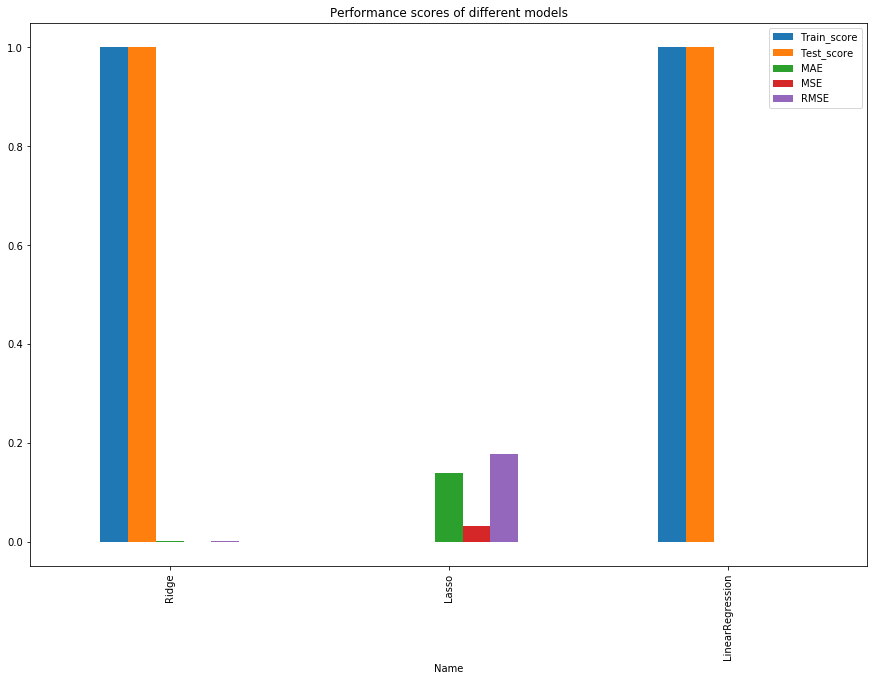

In [19]:
# execute the function
pipeline(models, x_train, x_test, y_train, y_test)